# Importações dos pacotes

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io


## Informações do enunciado

In [28]:
# http://compras.dados.gov.br/{modulo}/v1/{metodo}.{formato}?{parametro1=valor1}&{parametro2=valor2}&{parametroN=valorN}

# Please download the data for suppliers with the following CNAEs:
# a. 1011201 (FRIGORÍFICO - ABATE DE BOVINOS)
# b. 1011205 (MATADOURO - ABATE DE RESES SOB CONTRATO, EXCETO
# ABATE DE SUÍNOS)
# c. 1013901 (FABRICAÇÃO DE PRODUTOS DE CARNE)
# d. 1013902 (PREPARAÇÃO DE SUBPRODUTOS DO ABATE)

## Aquisição dos dados

In [29]:
lista_cnae = [1011201,1011205,1013901,1013902]

In [30]:
url='https://compras.dados.gov.br/'
modulo = 'fornecedores/v1/'
metodo = 'fornecedores'
formato = '.csv'
parametro1 = 'id_cnae='

In [38]:
# loop de aquisição de dados
dados = pd.DataFrame()                                          # Define uma dataframe vazia para salvar os dados
for i in lista_cnae:                                            # Define o loop que irá percorrer a lista de CNAEs
    try:
        fonte = url+modulo+metodo+formato+'?'+parametro1+str(i) # Cria o link de acesso para aquisição dos dados na API
        tmp = pd.read_csv(fonte)                                # Cria uma DataFrame temporária a partir do link
        dados = pd.concat([dados,tmp], axis=0)                  # Concatena os dados adiquiridos em dados
    except Exception as e:
        dados=0
        with open("WARNING-READ-ME-DELETE-ME.txt", "w") as file:
            file.write("Error: "+str(e)+'\n')                       # Escreve o tipo de erro
            file.write("Data aquisition problem.\n")
            file.write("Delete this Warning and try Again")          # Escreve para aguardar e tentar novamente mais tarde
        print("Error: "+str(e)+'\n')
dados.to_csv('dados.csv')

Error: HTTP Error 502: Bad Gateway

Error: HTTP Error 502: Bad Gateway

Error: HTTP Error 502: Bad Gateway

Error: HTTP Error 502: Bad Gateway



## Visualizações

In [39]:
dados.shape

(266, 16)

In [40]:
dados.columns

Index(['Unnamed: 0', 'Id', 'CNPJ', 'CPF', 'Nome', 'Ativo', 'Recadastrado',
       'Município', 'UF', 'Natureza Jurídica', 'Porte da Empresa',
       'Ramo do Negócio', 'Unidade Cadastradora', 'CNAE', 'CNAE Secundário',
       'Habilitado a Licitar'],
      dtype='object')

In [41]:
dados.isna().sum()

Unnamed: 0                0
Id                        0
CNPJ                      0
CPF                     266
Nome                      0
Ativo                     0
Recadastrado            266
Município                 0
UF                        0
Natureza Jurídica         0
Porte da Empresa          0
Ramo do Negócio         266
Unidade Cadastradora    266
CNAE                      0
CNAE Secundário         266
Habilitado a Licitar      0
dtype: int64

In [42]:
dados.head()

,Unnamed: 0,Id,CNPJ,CPF,Nome,Ativo,Recadastrado,Município,UF,Natureza Jurídica,Porte da Empresa,Ramo do Negócio,Unidade Cadastradora,CNAE,CNAE Secundário,Habilitado a Licitar
0,0,19591,01.702.122/0001-92,NaN,FRIGORIFICO VALE DO SAPUCAI LTDA - EM RECUPERA...,Sim,NaN,46477: Itajubá,MG,2: SOCIEDADE EMPRESÁRIA LIMITADA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
1,1,21267,01.838.723/0096-98,NaN,BRF S.A.,Não,NaN,91774: Mirassol D´Oeste,MT,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
2,2,35489,02.916.265/0004-02,NaN,JBS S/A,Sim,NaN,90514: Campo Grande,MS,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
3,3,35490,02.916.265/0005-93,NaN,JBS S/A,Sim,NaN,93734: Goiânia,GO,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
4,4,35492,02.916.265/0010-50,NaN,JBS S/A,Sim,NaN,90352: Barra do Garças,MT,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim


In [43]:
df = pd.read_csv('../data/raw/dados.csv')

In [44]:
df.head(3)

,Unnamed: 0,Id,CNPJ,CPF,Nome,Ativo,Recadastrado,Município,UF,Natureza Jurídica,Porte da Empresa,Ramo do Negócio,Unidade Cadastradora,CNAE,CNAE Secundário,Habilitado a Licitar
0,0,19591,01.702.122/0001-92,NaN,FRIGORIFICO VALE DO SAPUCAI LTDA - EM RECUPERA...,Sim,NaN,46477: Itajubá,MG,2: SOCIEDADE EMPRESÁRIA LIMITADA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
1,1,21267,01.838.723/0096-98,NaN,BRF S.A.,Não,NaN,91774: Mirassol D´Oeste,MT,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim
2,2,35489,02.916.265/0004-02,NaN,JBS S/A,Sim,NaN,90514: Campo Grande,MS,47: SOCIEDADE ANÔNIMA ABERTA,2: null,NaN,NaN,1011201: FRIGORÍFICO - ABATE DE BOVINOS,NaN,Sim


## Adaptação dos dados e Geração dos gráficos

In [45]:
estados = {'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
           'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
           'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
           'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
           'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
           'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
           'SE': 'Sergipe', 'TO': 'Tocantins'}

In [46]:
df['Estado'] = df['UF'].replace(estados)

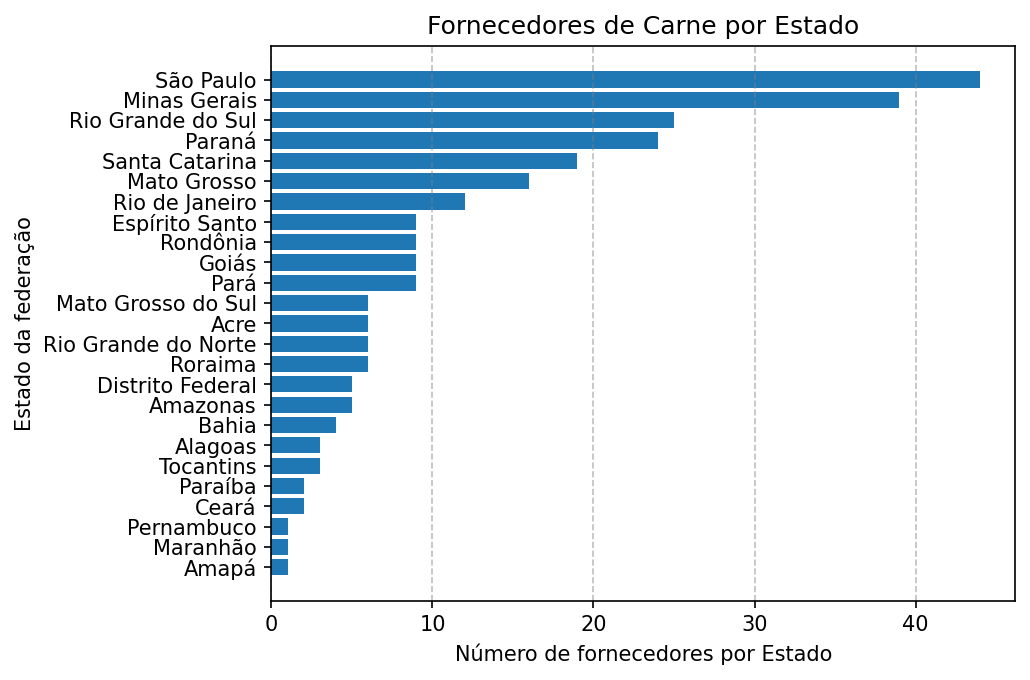

In [47]:
fig, ax = plt.subplots(dpi=150)
plt.title('Fornecedores de Carne por Estado')
plt.xlabel('Número de fornecedores por Estado')
plt.ylabel('Estado da federação')
df_plot = df[['Id','Estado']].groupby('Estado').count().sort_values(by=('Id')).reset_index()
plt.barh(df_plot['Estado'],df_plot['Id'])
plt.gca().xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.show(fig)

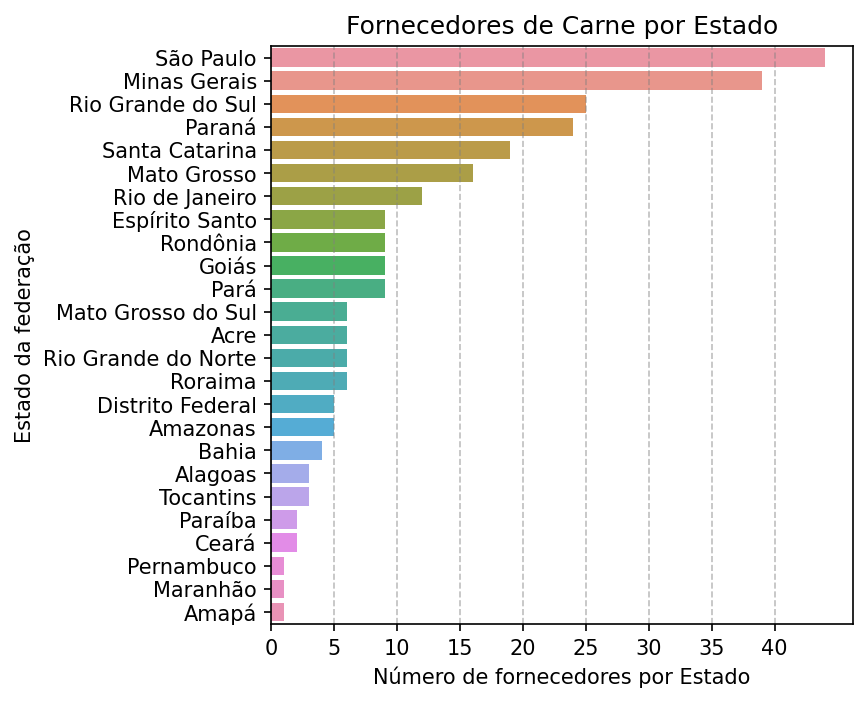

In [48]:
fig, ax = plt.subplots(figsize=(5,5),dpi=150)
df_plot = df[['Id','Estado']].groupby('Estado').count().sort_values(by=('Id')).reset_index()
sns.barplot(data=df_plot,y='Estado',x='Id',order=df_plot['Estado'][::-1])
plt.gca().xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.title('Fornecedores de Carne por Estado')
plt.xlabel('Número de fornecedores por Estado')
plt.ylabel('Estado da federação')
ax.set_xticks(range(0, 45, 5))
plt.savefig('../graphs/fornecedores_estados.png', bbox_inches='tight')
plt.show(fig)
